In [ ]:
import warnings
from synthcity.plugins import Plugins
from synthcity.utils.datasets.time_series.google_stocks import GoogleStocksDataloader
from synthcity.plugins.core.dataloader import TimeSeriesDataLoader

warnings.filterwarnings("ignore")


eval_plugin = "fflows"

In [2]:
# Load data
static_data, temporal_data, outcome = GoogleStocksDataloader(seq_len=4).load()
loader = TimeSeriesDataLoader(
    temporal_data=temporal_data, static_data=static_data, outcome=outcome,
)

loader.dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.091740,0.115236,0.147661,0.097320,0.078676,0.137224,0.101815,0.101690,0.095660,0.159676,...,0.138742,0.828301,0.536077,0.427052,0.329041,0.106540,0.137216,0.086580,0.138742,0.147661
1,0.410366,0.334177,0.375992,0.396731,0.385739,0.335194,0.372539,0.366370,0.360217,0.376783,...,0.342424,0.147704,0.070442,0.054026,0.103396,0.315262,0.357136,0.382377,0.342424,0.097320
2,0.347107,0.356082,0.370972,0.338457,0.354846,0.341510,0.327971,0.300769,0.395415,0.402001,...,0.275727,0.107991,0.058139,0.081314,0.143689,0.337494,0.351811,0.322563,0.275727,0.149420
3,0.656926,0.671996,0.681576,0.636042,0.658093,0.677519,0.656814,0.652603,0.681170,0.713405,...,0.640021,0.071750,0.064520,0.014319,0.022601,0.644917,0.653020,0.608171,0.640021,0.110283
4,0.569545,0.601197,0.656926,0.671996,0.563909,0.669142,0.658093,0.677519,0.583568,0.646130,...,0.653020,0.071298,0.058873,0.071750,0.064520,0.583654,0.634871,0.644917,0.653020,0.105667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.368675,0.309595,0.347107,0.356082,0.341137,0.314138,0.354846,0.341510,0.347454,0.357775,...,0.351811,0.106916,0.037867,0.107991,0.058139,0.288473,0.330479,0.337494,0.351811,0.636042
89,0.355297,0.319444,0.330682,0.392843,0.349061,0.292505,0.354438,0.406953,0.376624,0.351099,...,0.430519,0.087359,0.058793,0.070809,0.046833,0.316085,0.315218,0.373297,0.430519,0.665050
90,0.356082,0.370972,0.338457,0.290212,0.341510,0.327971,0.300769,0.244779,0.402001,0.345149,...,0.259170,0.058139,0.081314,0.143689,0.055860,0.351811,0.322563,0.275727,0.259170,0.834838
91,0.375992,0.396731,0.355297,0.319444,0.372539,0.366370,0.349061,0.292505,0.393474,0.389341,...,0.315218,0.054026,0.103396,0.087359,0.058793,0.382377,0.342424,0.316085,0.315218,0.870378


In [3]:
# Train the generator
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(loader)

In [4]:
# Generate new samples

syn_model.generate(count=10).dataframe()

,temporal_open_t0,temporal_open_t1,temporal_open_t2,temporal_open_t3,temporal_high_t0,temporal_high_t1,temporal_high_t2,temporal_high_t3,temporal_low_t0,temporal_low_t1,...,temporal_close_t3,temporal_volume_t0,temporal_volume_t1,temporal_volume_t2,temporal_volume_t3,temporal_adj_close_t0,temporal_adj_close_t1,temporal_adj_close_t2,temporal_adj_close_t3,out_open_next
0,0.234516,0.499539,0.234404,0.110279,0.525445,0.333105,0.168695,0.296011,0.078178,0.283103,...,0.285412,0.144689,0.335683,0.197415,0.121537,0.232442,0.263958,0.347044,0.302982,0.565842
1,0.146932,0.352911,0.234404,0.041157,0.326869,0.335980,0.143556,0.296163,0.316519,0.181956,...,0.188519,0.080287,0.335077,0.127644,0.005822,0.235399,0.281989,0.203784,0.297877,0.421119
2,0.279469,0.591137,0.496113,0.051627,0.288904,0.300554,0.487000,0.292257,0.105171,0.215588,...,0.062245,0.346409,0.866775,0.104741,0.068951,0.192108,0.286301,0.208651,0.038831,0.385345
3,0.001368,0.222528,0.496113,0.116084,0.330502,0.339551,0.166126,0.221401,0.035072,0.154304,...,0.176648,0.241862,0.198231,0.123897,0.091204,0.007551,0.262300,0.336641,0.166427,0.516379
4,0.119657,0.613742,0.234404,0.206071,0.456090,0.233948,0.474300,0.685953,0.060414,0.551439,...,0.350716,0.069018,0.311618,0.112804,0.042558,0.183162,0.276935,0.356689,0.263975,0.345835
5,0.203386,0.387006,0.496113,0.392669,0.122972,0.327880,0.313030,0.257668,0.357308,0.244850,...,0.251601,0.253073,0.337686,0.086898,0.036679,0.149528,0.175269,0.344993,0.315891,0.619235
6,0.159101,0.263926,0.496113,0.091731,0.206167,0.569420,0.299361,0.392864,0.033275,0.188215,...,0.251978,0.057647,0.761934,0.035450,0.356058,0.174281,0.467222,0.277209,0.140495,0.360510
7,0.120720,0.244273,0.496113,0.626851,0.264298,0.174403,0.318435,0.744597,0.161857,0.596423,...,0.229965,0.347509,0.372524,0.286698,0.059591,0.356110,0.185504,0.368030,0.388423,0.373433
8,0.302468,0.146185,0.237189,0.277693,0.265562,0.305639,0.495397,0.203165,0.178558,0.205966,...,0.263309,0.311159,0.172361,0.243074,0.169631,0.376843,0.283893,0.271500,0.171775,0.492964
9,0.234137,0.257361,0.496113,0.580505,0.188701,0.215336,0.328521,0.420591,0.372232,0.505639,...,0.271809,0.078356,0.834381,0.117863,0.010519,0.354067,0.168262,0.487623,0.483472,0.645107


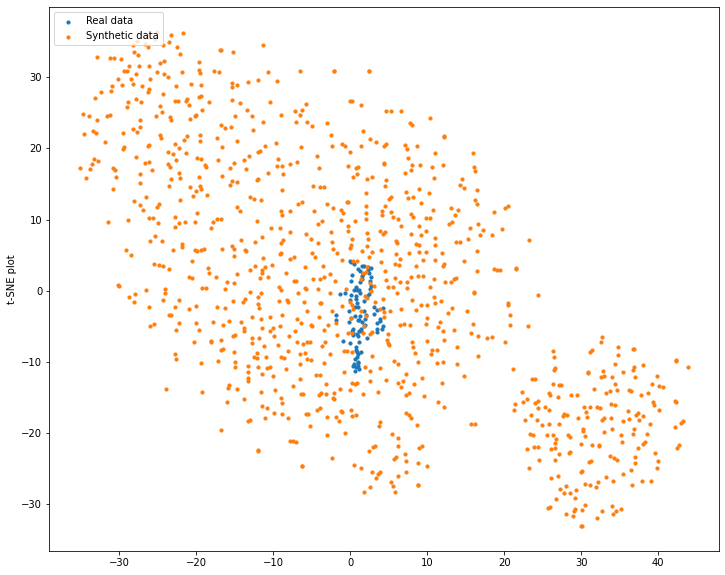

In [5]:
# plot

import matplotlib.pyplot as plt

syn_model.plot(plt, loader, count=1000, plots=["tsne"])

plt.show()

In [ ]:
# Benchmark
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate([eval_plugin], loader, task_type="time_series", repeats=2,)

In [ ]:
Benchmarks.print(score)